# verbose script inspecting model state

In [1]:
from matplotlib import pyplot as plt
from scipy.special import softmax
import numpy as np
from utils import *
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import time
tstamp = time.perf_counter_ns()

In [3]:
## import human data for fitting
import pandas as pd
hdf = pd.read_csv('../human_data.csv')
hB,hI = hdf.loc[:,('blocked mean','interleaved mean')].values.T

### run full exp

In [4]:
## processing data
def get_sm(xth):
  """ 
  given x_t_hat from subject
  [trial,layer,node]
  get 2afc normalized softmax for layer 2/3
  return: [trial,layer2/3,node56/78]
  """
  nodes = {2:(5,6),3:(7,8)} 
  L = [] # layer 2 and 3
  for l,ns in nodes.items():
    y = xth[:,l,ns]
#     y /= y.sum(1,keepdims=True) # if nrom required
#     print(y/y.sum(1,keepdims=True))
#     y = softmax(xth[:,l,ns],-1)
    L.append(y)
  return np.array(L)

def get_acc(data):
  """ 
  returns 2afc softmax of 
  layer 2/3 transitions
  """
  ysm = get_sm(data['xth'])
  L = []
  for i in range(2):
    ysml = ysm[i]
    yt = data['exp'][:,i+3] 
    pr_yt = ysml[range(len(ysml)),yt - (5+2*i)] # 
    L.append(pr_yt)
  return np.array(L)

### RUN EXP
def run_batch_exp(ns,args):
  """ exp over seeds, single task_condition param config
  return full data
  """
  dataL = []
  for i in range(ns):
    task = Task()
    sem = SEM(args['sch'])
    exp,curr  = task.generate_experiment(**args['exp'])
    data = sem.run_exp(exp)
    data['exp']=exp
    dataL.append(data)
  return dataL

def run_batch_exp_curr(ns,args,currL=['blocked','interleaved']):
  """ loop over task conditions, return accuracy
  return shape [task_condition,seed,trial]
  """
  L = []
  for curr in currL:
    args['exp']['condition'] = curr
    dataL = run_batch_exp(ns,args)
    acc = np.array([get_acc(data) for data in dataL]).mean(1) # mean over layer
    L.append(acc)
  return np.array(L)

In [5]:
### RUN EXP
ns = 25
schargs = {
  'concentration':1.9, # 1.9
  'stickiness_wi':10, # 10
  'stickiness_bt':10, # 10
  'sparsity':0.1 # 0.1
}

expargs = {
  'condition':None,
  'n_train':160,
  'n_test':40
}
args = {
  'sch':schargs,
  'exp':expargs
  }

ns = 20
accB,accI = run_batch_exp_curr(ns,args,currL=['blocked','interleaved']).mean(1) # over seeds

In [6]:
paramstr = "alfa%.4f-betawi%.4f-betabt%.4f-lmda%.4f"%tuple(schargs.values())
paramstr

'alfa1.9000-betawi10.0000-betabt10.0000-lmda0.1000'

## accuracy plots

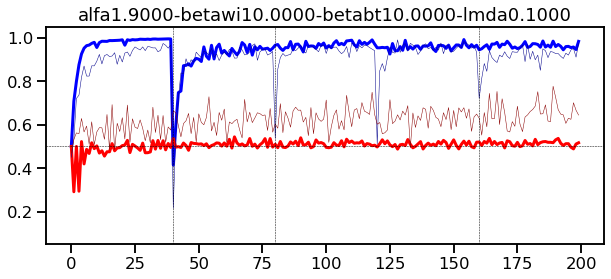

In [27]:
plt.figure(figsize=(10,4))
## plot model
plt.plot(accB,c='b',lw=3)
plt.plot(accI,c='r',lw=3)
# human
plt.plot(range(len(hB)),hB,c='darkblue',lw=0.5)
plt.plot(range(len(hI)),hI,c='darkred',lw=0.5)
# gridlines
plt.axhline(0.5,c='k',lw=0.5,ls='--')
for v in [40,80,160]:
  plt.axvline(v,c='k',lw=0.5,ls='--')
  
## 
plt.title(paramstr)
plt.ylim(0.05,1.05)
plt.savefig('figures/scratch/acc-BI-%i'%tstamp)

In [8]:
accE,accM,accL = run_batch_exp_curr(ns,args,currL=['early','middle','late']).mean(1)

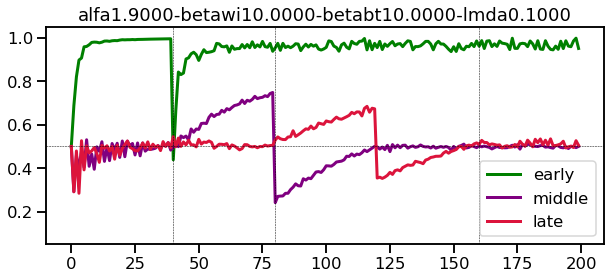

In [26]:
plt.figure(figsize=(10,4))

## plot model
plt.plot(accE,c='g',lw=3,label='early')
plt.plot(accM,c='purple',lw=3,label='middle')
plt.plot(accL,c='crimson',lw=3,label='late')
plt.ylim(0.05,1.05)
plt.legend(loc=0)

# gridlines
plt.axhline(0.5,c='k',lw=0.5,ls='--')
for v in [40,80,160]:
  plt.axvline(v,c='k',lw=0.5,ls='--')
plt.title(paramstr)

plt.savefig('figures/scratch/acc-EML-%i'%tstamp)

# further analyses


In [10]:
args['exp']['condition']='blocked'
ns = 3
dataL = run_batch_exp(ns,args)
len(dataL)

3

In [11]:
seed_data = dataL[2]
print(seed_data.keys())
sch_inf = seed_data['zt'] # schema inference at each timestep
sch_inf


dict_keys(['zt', 'xth', 'priors', 'likesL2', 'postL2', 'exp'])


array([[ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  

In [12]:
seed_data['exp']

array([[0, 1, 3, 5, 7],
       [0, 1, 4, 6, 8],
       [0, 1, 4, 6, 8],
       [0, 1, 4, 6, 8],
       [0, 1, 3, 5, 7],
       [0, 1, 3, 5, 7],
       [0, 1, 4, 6, 8],
       [0, 1, 3, 5, 7],
       [0, 1, 3, 5, 7],
       [0, 1, 3, 5, 7],
       [0, 1, 4, 6, 8],
       [0, 1, 3, 5, 7],
       [0, 1, 3, 5, 7],
       [0, 1, 4, 6, 8],
       [0, 1, 3, 5, 7],
       [0, 1, 4, 6, 8],
       [0, 1, 3, 5, 7],
       [0, 1, 4, 6, 8],
       [0, 1, 4, 6, 8],
       [0, 1, 3, 5, 7],
       [0, 1, 4, 6, 8],
       [0, 1, 3, 5, 7],
       [0, 1, 3, 5, 7],
       [0, 1, 3, 5, 7],
       [0, 1, 3, 5, 7],
       [0, 1, 3, 5, 7],
       [0, 1, 3, 5, 7],
       [0, 1, 3, 5, 7],
       [0, 1, 4, 6, 8],
       [0, 1, 3, 5, 7],
       [0, 1, 4, 6, 8],
       [0, 1, 4, 6, 8],
       [0, 1, 3, 5, 7],
       [0, 1, 4, 6, 8],
       [0, 1, 4, 6, 8],
       [0, 1, 4, 6, 8],
       [0, 1, 3, 5, 7],
       [0, 1, 4, 6, 8],
       [0, 1, 3, 5, 7],
       [0, 1, 4, 6, 8],
       [0, 2, 4, 5, 8],
       [0, 2, 3,

In [13]:
assert False

AssertionError: 

### accuracy for prediction following E2 and E3

In [ ]:
acc = np.array([get_acc(data) for data in dataL]) # sub,layer,trial
f,ax = plt.subplots(1,2,figsize=(15,5),)
for i in range(2):
  M = acc[:,i].mean(0)
  ax[i].plot(M)
  ax[i].set_ylim(0.2,1.05)
 

### inspect predictions


In [ ]:
xth=data['xth']
l=2
ns=(5,6)
ysm = softmax(xth[:,l,ns],1)
yh = xth[:,l,ns]
ysm = softmax(yh,-1)
for y,ys,e in zip(yh,ysm,exp):
  print(y,ys,e[:l+1])
exp.shape

In [ ]:
### schema usage
f,ax = plt.subplots(1,2,figsize=(16,5))
zt = data['zt'][:,:-1].flatten()
ax[0].hist(zt)
ax[1].plot(data['zt'][:,:-1].mean(1))

In [ ]:
### schema usage
[np.unique(d['zt']) for d in dataL] 

In [ ]:
for p in data['priors']:
  print(p)

In [ ]:
for like in data['likesL2']:
  print(like)

In [ ]:
for i,po in enumerate(data['postL2']):
  print(i,po)